<a href="https://colab.research.google.com/github/jpbarragan99/bioactivity_predictionApp/blob/main/bioact_prediction_app.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **QSAR Model Building of Dengue Virus Type 2 NS3**

Credits to Chanin Nantasenamat.

## **Read in data**

In [2]:
import pandas as pd

In [3]:
dataset_url = 'https://github.com/jpbarragan99/BioInf_Project1/raw/main/data/06_bioactivity_data_3class_pIC50_pubchem_fp.csv'
dataset = pd.read_csv(dataset_url)
dataset

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.909742
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.292685
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.187087
1174,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.987163
1175,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.795880
1176,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.508638


In [4]:
X = dataset.drop(['pIC50'], axis = 1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1174,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1175,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1176,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [5]:
Y = dataset.iloc[:,-1]
Y

0       4.000000
1       4.909742
2       4.000000
3       4.292685
4       4.000000
          ...   
1173    5.187087
1174    4.987163
1175    5.795880
1176    5.508638
1177    5.036212
Name: pIC50, Length: 1178, dtype: float64

## **Removing low variance features**

In [6]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance (input_data, threshold = 0.1):
  selection = VarianceThreshold(threshold)
  selection.fit(input_data)
  return input_data[input_data.columns[selection.get_support(indices = True)]]

X = remove_low_variance(X, threshold = 0.1)
X

,PubchemFP2,PubchemFP12,PubchemFP15,PubchemFP16,PubchemFP20,PubchemFP33,PubchemFP34,PubchemFP37,PubchemFP143,PubchemFP145,...,PubchemFP776,PubchemFP777,PubchemFP779,PubchemFP797,PubchemFP798,PubchemFP800,PubchemFP818,PubchemFP819,PubchemFP821,PubchemFP824
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0
2,1,1,1,0,1,0,0,0,1,1,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,1,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
4,0,1,1,1,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1173,1,1,1,1,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,1,0
1174,1,1,1,0,0,0,0,0,1,1,...,1,1,0,0,0,1,0,0,1,0
1175,1,1,1,0,0,0,0,0,1,1,...,1,0,0,0,0,1,0,0,1,0
1176,1,1,1,0,0,0,0,0,1,1,...,1,0,1,1,0,1,1,0,1,0


In [7]:
X.to_csv('descriptor_list.csv', index = False)

In the app, use the following to get the same descriptor list:
* of 218 variables from the initial set of 881 variables
* Xlist = list(pd.read_csv('descriptor_list.csv').columns)
* X[Xlist]

## **Random Forest Regression Model**

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
model = RandomForestRegressor(n_estimators = 500, random_state = 42)
model.fit (X, Y)
r2 = model.score (X, Y)
r2

0.8791795421133135

## **Model Prediction**

In [10]:
Y_pred = model.predict(X)
Y_pred

array([4.22605397, 4.79360749, 4.14783122, ..., 5.59501474, 5.33974319,
       4.92253633])

## **Model Performance**

In [11]:
print ('Mean squared error (MSE): %.2f'
        % mean_squared_error(Y, Y_pred))
print ('Coefficient of determination (R^2): %.2f'
        % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.03
Coefficient of determination (R^2): 0.88


## **Data Visualization (Experimental vs Predicted pIC50 for Training Data)**

In [12]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pIC50')

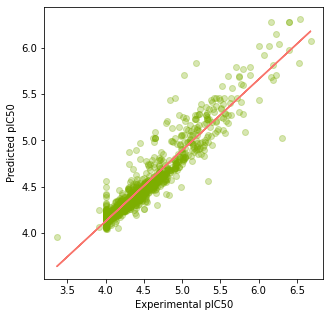

In [15]:
plt.figure(figsize=(5,5))
plt.scatter (x = Y, y = Y_pred, c = '#7CAE00', alpha = 0.3)

z = np.polyfit (Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot (Y,p(Y), "#F8766D")
plt.ylabel ('Predicted pIC50')
plt.xlabel ('Experimental pIC50')

## **Save Model as Pickle Object**

In [17]:
import pickle

pickle.dump(model, open ('NS3_model.pkl', 'wb'))